In [1]:
import pandas as pd

df = pd.read_csv("transactions_data100.csv")

df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,474,CASH_IN,393851.81,C181906846,15332.00,409183.81,C1976076902,1028967.32,635115.51,0,0
1,133,CASH_IN,82512.74,C1033177365,4670885.40,4753398.14,C280905610,88993.63,6480.89,0,0
2,355,CASH_OUT,186989.64,C2095557679,21492.00,0.00,C534347764,0.00,186989.64,0,0
3,347,PAYMENT,8766.65,C616325886,273418.04,264651.39,M243248222,0.00,0.00,0,0
4,398,CASH_IN,90775.40,C1685153430,1901409.38,1992184.78,C410914194,360275.57,269500.17,0,0


In [2]:
# Sample 3 rows where isFraud == 1 (if available, else use 0s)
if (df['isFraud'] == 1).sum() >= 3:
    df_true = df[df['isFraud'] == 1].sample(3, random_state=42)



# Remove 'isFraud' and 'isFlaggedFraud' columns if present
cols_to_drop = [col for col in ['isFraud', 'isFlaggedFraud'] if col in df_true.columns]
df_true = df_true.drop(columns=cols_to_drop)

# Save to CSV
df_true.to_csv("3are1.csv", index=False)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [33]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,243.853410,1.811370e+05,8.367224e+05,8.583477e+05,1.098468e+06,1.223258e+06,0.001290,0.0
std,142.204462,6.112551e+05,2.908059e+06,2.945049e+06,3.168895e+06,3.452344e+06,0.035894,0.0
min,1.000000,7.800000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,156.000000,1.344863e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,239.000000,7.532171e+04,1.446250e+04,0.000000e+00,1.309658e+05,2.155518e+05,0.000000,0.0
75%,334.000000,2.105191e+05,1.077892e+05,1.447812e+05,9.492111e+05,1.112916e+06,0.000000,0.0
max,739.000000,5.072328e+07,3.856340e+07,3.893942e+07,2.355353e+08,2.358797e+08,1.000000,0.0


In [34]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,100000,1.000000e+05,100000,1.000000e+05,1.000000e+05,100000,1.000000e+05,1.000000e+05,100000.000000,100000.0
unique,NaN,5,NaN,99997,NaN,NaN,92875,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1746077889,NaN,NaN,C565687173,NaN,NaN,NaN,NaN
freq,NaN,35180,NaN,2,NaN,NaN,6,NaN,NaN,NaN,NaN
mean,243.853410,NaN,1.811370e+05,NaN,8.367224e+05,8.583477e+05,NaN,1.098468e+06,1.223258e+06,0.001290,0.0
std,142.204462,NaN,6.112551e+05,NaN,2.908059e+06,2.945049e+06,NaN,3.168895e+06,3.452344e+06,0.035894,0.0
min,1.000000,NaN,7.800000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0
25%,156.000000,NaN,1.344863e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0
50%,239.000000,NaN,7.532171e+04,NaN,1.446250e+04,0.000000e+00,NaN,1.309658e+05,2.155518e+05,0.000000,0.0
75%,334.000000,NaN,2.105191e+05,NaN,1.077892e+05,1.447812e+05,NaN,9.492111e+05,1.112916e+06,0.000000,0.0


In [35]:
df.count()

step              100000
type              100000
amount            100000
nameOrig          100000
oldbalanceOrg     100000
newbalanceOrig    100000
nameDest          100000
oldbalanceDest    100000
newbalanceDest    100000
isFraud           100000
isFlaggedFraud    100000
dtype: int64

In [36]:
print("Unique values:", df["isFraud"].unique())
print("\nValue counts:\n", df["isFraud"].value_counts())

Unique values: [0 1]

Value counts:
 isFraud
0    99871
1      129
Name: count, dtype: int64


In [37]:
df[df['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2114,238,CASH_OUT,65091.34,C1854275574,65091.34,0.0,C1828878126,0.0,65091.34,1,0
4785,311,TRANSFER,227624.30,C2064336595,227624.30,0.0,C1761158321,0.0,0.00,1,0
4807,288,TRANSFER,1905476.22,C693914149,1905476.22,0.0,C392618235,0.0,0.00,1,0
7643,207,TRANSFER,38427.47,C433911450,38427.47,0.0,C2145994547,0.0,0.00,1,0
7696,679,TRANSFER,3150438.28,C1921052827,3150438.28,0.0,C117597233,0.0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
95590,541,TRANSFER,5512595.16,C866940482,5512595.16,0.0,C439777309,0.0,0.00,1,0
95867,425,CASH_OUT,10000000.00,C749563037,10000000.00,0.0,C606914329,0.0,10000000.00,1,0
96509,392,TRANSFER,193706.98,C1216488552,193706.98,0.0,C2142754962,0.0,0.00,1,0
96754,361,TRANSFER,299016.86,C1499900306,299016.86,0.0,C1983606729,0.0,0.00,1,0


In [38]:
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [39]:
print(df.nunique())

step                467
type                  5
amount            99594
nameOrig          99997
oldbalanceOrg     54380
newbalanceOrig    43296
nameDest          92875
oldbalanceDest    57485
newbalanceDest    61620
isFraud               2
isFlaggedFraud        1
dtype: int64


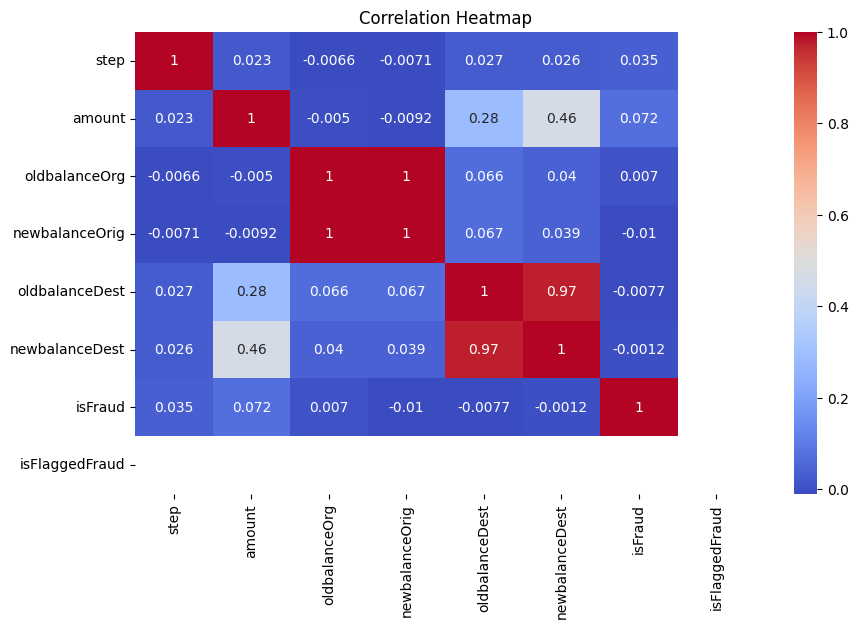

In [40]:
import seaborn as sns

import matplotlib.pyplot as plt

# Select only numeric columns for the heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
target_col = "isFraud"

# Loop through non-numeric columns
for col in df.select_dtypes(exclude="number").columns:
    print(f"\n--- Correlation of '{col}' values with {target_col} ---")
    
    # One-hot encode
    encoded = pd.get_dummies(df[col], prefix=col, drop_first=False)
    
    # Correlation with target
    cor_with_target = pd.concat([encoded, df[target_col]], axis=1).corr()[target_col].drop(target_col)

    print(cor_with_target.sort_values(ascending=False))


--- Correlation of 'type' values with isFraud ---
type_TRANSFER    0.060437
type_CASH_OUT    0.007362
type_DEBIT      -0.002889
type_CASH_IN    -0.019065
type_PAYMENT    -0.025692
Name: isFraud, dtype: float64

--- Correlation of 'nameOrig' values with isFraud ---


MemoryError: Unable to allocate 74.5 GiB for an array with shape (99998, 100000) and data type float64

In [42]:
df.drop(['isFlaggedFraud'], axis=1, inplace=True)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,474,CASH_IN,393851.81,C181906846,15332.00,409183.81,C1976076902,1028967.32,635115.51,0
1,133,CASH_IN,82512.74,C1033177365,4670885.40,4753398.14,C280905610,88993.63,6480.89,0
2,355,CASH_OUT,186989.64,C2095557679,21492.00,0.00,C534347764,0.00,186989.64,0
3,347,PAYMENT,8766.65,C616325886,273418.04,264651.39,M243248222,0.00,0.00,0
4,398,CASH_IN,90775.40,C1685153430,1901409.38,1992184.78,C410914194,360275.57,269500.17,0


In [43]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in '{col}': {len(outliers)}")

Outliers in 'step': 1624
Outliers in 'amount': 5234
Outliers in 'oldbalanceOrg': 17570
Outliers in 'newbalanceOrig': 16560
Outliers in 'oldbalanceDest': 12390
Outliers in 'newbalanceDest': 11635
Outliers in 'isFraud': 129


In [44]:
# Normalize numerical columns using IQR and median, except 'isFraud'
df_normalized = df.copy()
numeric_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'isFraud']

for col in numeric_cols:
    median = df[col].median()
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    # Avoid division by zero
    if iqr == 0:
        df_normalized[col] = df[col] - median
    else:
        df_normalized[col] = (df[col] - median) / iqr

df_normalized.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1.320225,CASH_IN,1.616326,C181906846,0.008067,2.826222,C1976076902,0.946050,0.376995,0
1,-0.595506,CASH_IN,0.036490,C1033177365,43.199326,32.831594,C280905610,-0.044218,-0.187859,0
2,0.651685,CASH_OUT,0.566640,C2095557679,0.065215,0.000000,C534347764,-0.137973,-0.025664,0
3,0.606742,PAYMENT,-0.337722,C616325886,2.402425,1.827940,M243248222,-0.137973,-0.193682,0
4,0.893258,CASH_IN,0.078417,C1685153430,17.505891,13.759967,C410914194,0.241579,0.048475,0


In [45]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_normalized.copy()

for col in df.select_dtypes(exclude="number").columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [46]:
df_encoded

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1.320225,0,1.616326,42645,0.008067,2.826222,29855,0.946050,0.376995,0
1,-0.595506,0,0.036490,1751,43.199326,32.831594,37156,-0.044218,-0.187859,0
2,0.651685,1,0.566640,56793,0.065215,0.000000,44789,-0.137973,-0.025664,0
3,0.606742,3,-0.337722,80314,2.402425,1.827940,79531,-0.137973,-0.193682,0
4,0.893258,0,0.078417,35712,17.505891,13.759967,41020,0.241579,0.048475,0
...,...,...,...,...,...,...,...,...,...,...
99995,-1.280899,1,0.350805,29639,-0.134174,0.000000,10937,0.257974,0.273822,0
99996,-0.421348,1,0.446299,77249,-0.134174,0.000000,22917,0.461852,0.464620,0
99997,0.747191,0,0.814773,89835,15.757781,13.460802,32916,22.259181,18.696990,0
99998,0.674157,0,0.085197,75164,53.125351,40.287794,12577,0.117613,-0.058457,0


In [47]:
df_encoded.to_csv("cleanData100.csv", index=False)

In [2]:
import pandas as pd

df = pd.read_csv("cleanData100.csv")

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1.320225,0,1.616326,42645,0.008067,2.826222,29855,0.946050,0.376995,0
1,-0.595506,0,0.036490,1751,43.199326,32.831594,37156,-0.044218,-0.187859,0
2,0.651685,1,0.566640,56793,0.065215,0.000000,44789,-0.137973,-0.025664,0
3,0.606742,3,-0.337722,80314,2.402425,1.827940,79531,-0.137973,-0.193682,0
4,0.893258,0,0.078417,35712,17.505891,13.759967,41020,0.241579,0.048475,0


In [123]:
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [50]:
print("Distribution of 'isFraud' in training set:")
print(y_train.value_counts(normalize=True))

print("\nDistribution of 'isFraud' in testing set:")
print(y_test.value_counts(normalize=True))

Distribution of 'isFraud' in training set:
isFraud
0    0.998713
1    0.001288
Name: proportion, dtype: float64

Distribution of 'isFraud' in testing set:
isFraud
0    0.9987
1    0.0013
Name: proportion, dtype: float64


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.99955

Confusion Matrix:
 [[19973     1]
 [    8    18]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19974
           1       0.95      0.69      0.80        26

    accuracy                           1.00     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       1.00      1.00      1.00     20000



In [52]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Print evaluation metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.99975

Confusion Matrix:
 [[19974     0]
 [    5    21]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19974
           1       1.00      0.81      0.89        26

    accuracy                           1.00     20000
   macro avg       1.00      0.90      0.95     20000
weighted avg       1.00      1.00      1.00     20000



In [53]:
from sklearn.svm import SVC

# Initialize and train SVM model
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm.predict(X_test)

# Print evaluation metrics
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9987

Confusion Matrix:
 [[19974     0]
 [   26     0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19974
           1       0.00      0.00      0.00        26

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000



C:\Users\warif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\warif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\warif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [54]:
# Initialize and train XGBoost model
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)
# Print evaluation metrics
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.99965

Confusion Matrix:
 [[19972     2]
 [    5    21]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19974
           1       0.91      0.81      0.86        26

    accuracy                           1.00     20000
   macro avg       0.96      0.90      0.93     20000
weighted avg       1.00      1.00      1.00     20000



Classification Report:
              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9999     19974
           1     1.0000    0.8077    0.8936        26

    accuracy                         0.9998     20000
   macro avg     0.9999    0.9038    0.9467     20000
weighted avg     0.9998    0.9998    0.9997     20000

Confusion Matrix:


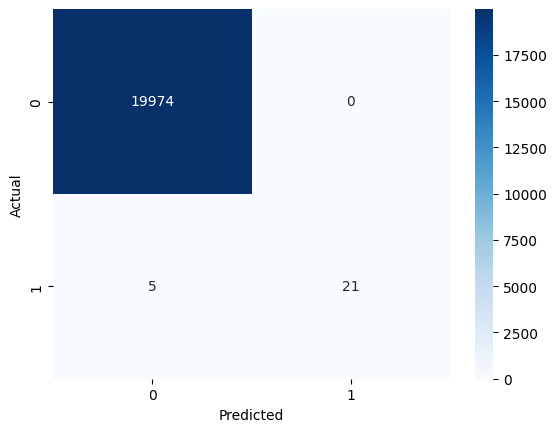

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest with class_weight='balanced' to handle imbalance
rf = RandomForestClassifier(
    n_estimators=170,          # number of trees
    max_depth=20,            # let trees expand fully
    class_weight="balanced",   # adjust weights inversely proportional to class freq
    random_state=42,
    n_jobs=-1                  # use all CPUs
)

# Fit the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999     19974
           1     1.0000    0.8462    0.9167        26

    accuracy                         0.9998     20000
   macro avg     0.9999    0.9231    0.9583     20000
weighted avg     0.9998    0.9998    0.9998     20000

Confusion Matrix:


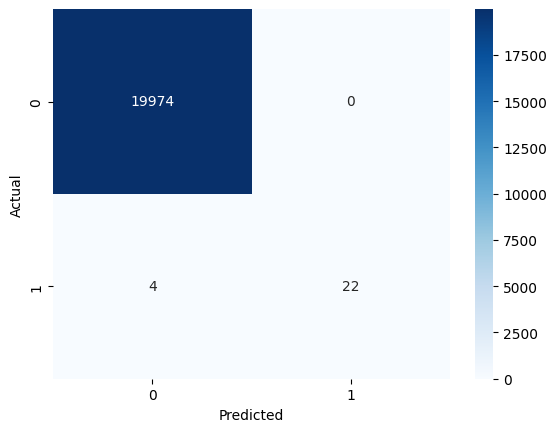

In [86]:
# Random Forest with class_weight='balanced' to handle imbalance
rf = RandomForestClassifier(
    n_estimators=170,          # number of trees
    max_depth=20,            # let trees expand fully
    #class_weight="balanced",   # adjust weights inversely proportional to class freq
    random_state=42,
    class_weight={0:1, 1:5},   # custom weights
    n_jobs=-1                  # use all CPUs
)

# Fit the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None}

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9999     19974
           1     1.0000    0.8077    0.8936        26

    accuracy                         0.9998     20000
   macro avg     0.9999    0.9038    0.9467     20000
weighted avg     0.9998    0.9998    0.9997     20000

Confusion Matrix:


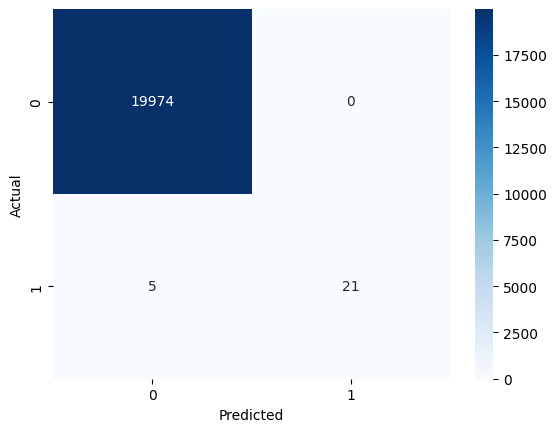

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Base model with fixed class weights
rf = RandomForestClassifier(
    class_weight={0:1, 1:5},
    random_state=42,
    n_jobs=-1
)

# Parameter grid (excluding class_weight)
param_dist = {
    "n_estimators": [100, 150, 170, 200, 300],
    "max_depth": [10, 15, 20, 25, None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Randomized search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                # number of random configs to try
    scoring="recall",         # optimize for recall (avoid false negatives)
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search
rf_random.fit(X_train, y_train)

# Best model
print("Best Parameters:", rf_random.best_params_)
best_rf = rf_random.best_estimator_

# Evaluate on test set
y_pred = best_rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [81]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Base model
rf = RandomForestClassifier(
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Parameter grid
param_dist = {
    "n_estimators": [100, 150, 170, 200, 300],
    "max_depth": [10, 15, 20, 25, None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Randomized search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                # number of random configs to try
    scoring="f1",             # fraud detection cares about F1
    cv=3,                     # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search
rf_random.fit(X_train, y_train)

# Best model
print("Best Parameters:", rf_random.best_params_)

best_rf = rf_random.best_estimator_

# Evaluate on test set
y_pred = best_rf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9999     19974
           1     1.0000    0.8077    0.8936        26

    accuracy                         0.9998     20000
   macro avg     0.9999    0.9038    0.9467     20000
weighted avg     0.9998    0.9998    0.9997     20000



In [82]:
# Base model
rf = RandomForestClassifier(
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Parameter grid
param_dist = {
    "n_estimators": [100, 150, 170, 200, 300],
    "max_depth": [10, 15, 20, 25, None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Randomized search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                # number of random configs to try
    scoring="recall",             # fraud detection cares about F1
    cv=3,                     # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search
rf_random.fit(X_train, y_train)

# Best model
print("Best Parameters:", rf_random.best_params_)

best_rf = rf_random.best_estimator_

# Evaluate on test set
y_pred = best_rf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     19974
           1     0.7778    0.8077    0.7925        26

    accuracy                         0.9994     20000
   macro avg     0.8888    0.9037    0.8961     20000
weighted avg     0.9995    0.9994    0.9995     20000



In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt.predict(X_test)

# Print evaluation metrics
print("Decision Tree Accuracy:", dt.score(X_test, y_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9995

Confusion Matrix:
 [[19968     6]
 [    4    22]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19974
           1       0.79      0.85      0.81        26

    accuracy                           1.00     20000
   macro avg       0.89      0.92      0.91     20000
weighted avg       1.00      1.00      1.00     20000



In [90]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train CatBoost model
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='F1',
    random_seed=42,
    verbose=100
)

cat_model.fit(X_train, y_train)

# Predict on test set
y_pred_cat = cat_model.predict(X_test)

# Print evaluation metrics
print("CatBoost Accuracy:", (y_pred_cat == y_test).mean())
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cat, digits=4))

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.8/102.4 MB 3.4 MB/s eta 0:00:31
    --------------------------------------- 2.1/102.4 MB 4.3 MB/s eta 0:00:24
    --------------------------------------- 2.4/102.4 MB 4.5 MB/s eta 0:00:23
   - -------------------------------------- 4.7/102.4 MB 5.9 MB/s eta 0:00:17
   -- ------------------------------------- 5.5/102.4 MB 5.2 MB/s eta 0:00:19
   -- ------------------------------------- 6.3/102.4 MB 5.2 MB/s eta 0:00:19
   --- ------------------------------------ 8.1/102.4 MB 5.5 MB/s eta 0:00:18
   --- ------------------------------------ 9.2/102.4 MB 5.3 MB/s eta 0:00:18
   ---- ----------------------------------- 10.5/102.4 MB 5.4 MB/s eta 0:00:18
   ---


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\warif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


0:	learn: 0.0000000	total: 164ms	remaining: 1m 21s
100:	learn: 0.9214660	total: 922ms	remaining: 3.64s
200:	learn: 0.9801980	total: 1.68s	remaining: 2.49s
300:	learn: 0.9801980	total: 2.46s	remaining: 1.62s
400:	learn: 0.9951220	total: 3.21s	remaining: 792ms
499:	learn: 1.0000000	total: 3.89s	remaining: 0us
CatBoost Accuracy: 0.99985

Confusion Matrix:
 [[19974     0]
 [    3    23]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999     19974
           1     1.0000    0.8846    0.9388        26

    accuracy                         0.9999     20000
   macro avg     0.9999    0.9423    0.9694     20000
weighted avg     0.9999    0.9999    0.9998     20000



In [93]:
# Initialize and train CatBoost model
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='Recall',
    random_seed=42,
    verbose=100
)

cat_model.fit(X_train, y_train)

# Predict on test set
y_pred_cat = cat_model.predict(X_test)

# Print evaluation metrics
print("CatBoost Accuracy:", (y_pred_cat == y_test).mean())
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cat, digits=4))

0:	learn: 0.0000000	total: 16.8ms	remaining: 8.38s
100:	learn: 0.8543689	total: 1.06s	remaining: 4.19s
200:	learn: 0.9611650	total: 2.04s	remaining: 3.03s
300:	learn: 0.9611650	total: 3.08s	remaining: 2.04s
400:	learn: 0.9902913	total: 4.08s	remaining: 1.01s
499:	learn: 1.0000000	total: 5.11s	remaining: 0us
CatBoost Accuracy: 0.99985

Confusion Matrix:
 [[19974     0]
 [    3    23]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999     19974
           1     1.0000    0.8846    0.9388        26

    accuracy                         0.9999     20000
   macro avg     0.9999    0.9423    0.9694     20000
weighted avg     0.9999    0.9999    0.9998     20000



In [91]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Base CatBoost model (silent mode to avoid too much logging)
cat_model = CatBoostClassifier(
    eval_metric='F1',
    random_seed=42,
    verbose=0,
    thread_count=-1
)

# Parameter grid to search
param_dist = {
    "iterations": [300, 500, 800],
    "learning_rate": [0.01, 0.05, 0.1],
    "depth": [4, 6, 8, 10],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "border_count": [32, 50, 100]  # number of splits for numerical features
}

# Randomized search
cat_random = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=15,               # try 15 random combinations
    scoring="recall",        # optimize for recall to avoid false negatives
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search
cat_random.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", cat_random.best_params_)
best_cat = cat_random.best_estimator_

# Evaluate on test set
y_pred_cat = best_cat.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_cat, digits=4))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_cat))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 800, 'depth': 6, 'border_count': 32}

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9999    0.9999     19974
           1     0.9565    0.8462    0.8980        26

    accuracy                         0.9998     20000
   macro avg     0.9782    0.9231    0.9489     20000
weighted avg     0.9997    0.9998    0.9997     20000


Confusion Matrix:
[[19973     1]
 [    4    22]]


In [94]:
# Initialize and train CatBoost model
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='Recall',
    random_seed=42,
    verbose=100
)

cat_model.fit(X_train, y_train)

# Predict on test set
y_pred_cat = cat_model.predict(X_test)

# Print evaluation metrics
print("CatBoost Accuracy:", (y_pred_cat == y_test).mean())
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cat, digits=4))

0:	learn: 0.0000000	total: 17.1ms	remaining: 8.51s
100:	learn: 0.8543689	total: 1.17s	remaining: 4.63s
200:	learn: 0.9611650	total: 2.09s	remaining: 3.11s
300:	learn: 0.9611650	total: 3s	remaining: 1.98s
400:	learn: 0.9902913	total: 3.9s	remaining: 962ms
499:	learn: 1.0000000	total: 4.77s	remaining: 0us
CatBoost Accuracy: 0.99985

Confusion Matrix:
 [[19974     0]
 [    3    23]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999     19974
           1     1.0000    0.8846    0.9388        26

    accuracy                         0.9999     20000
   macro avg     0.9999    0.9423    0.9694     20000
weighted avg     0.9999    0.9999    0.9998     20000



In [95]:
import joblib

# Save the trained CatBoost model to a file
joblib.dump(cat_model, "catboost_model.joblib")

['catboost_model.joblib']

# unsupervised

In [101]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Isolation Forest
iso = IsolationForest(
    n_estimators=200,       # number of trees
    max_samples='auto',     
    contamination=y.mean(), # approximate fraction of frauds in data
    random_state=42,
    n_jobs=-1
)

# Fit on training features only (unsupervised)
iso.fit(X_train)

# Predict anomalies
# -1 = anomaly (fraud), 1 = normal
y_pred_iso = iso.predict(X_test)
# Convert to 0/1 format to match y_test
y_pred_iso = [1 if i == -1 else 0 for i in y_pred_iso]

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred_iso, digits=4))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_iso)
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0     0.9987    0.9982    0.9985     19974
           1     0.0000    0.0000    0.0000        26

    accuracy                         0.9970     20000
   macro avg     0.4993    0.4991    0.4992     20000
weighted avg     0.9974    0.9970    0.9972     20000


Confusion Matrix:
[[19939    35]
 [   26     0]]


In [102]:
import numpy as np

# Get anomaly scores (-1 for anomaly, 1 for normal) for all data
iso_clusters = iso.predict(X)
# Convert to 0 (normal) and 1 (anomaly/fraud) for clarity
iso_clusters = [1 if c == -1 else 0 for c in iso_clusters]

# Show counts of each cluster
unique, counts = np.unique(iso_clusters, return_counts=True)
print("Isolation Forest cluster counts:")
for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c} samples")

Isolation Forest cluster counts:
Cluster 0: 99861 samples
Cluster 1: 139 samples


In [103]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# نستخدم فقط الميزات بدون العمود isFraud
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# تقسيم البيانات (اختياري إذا تبي تقيم الأداء)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# تدريب نموذج Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)  
iso.fit(X_train)

# التنبؤ: -1 = anomaly, 1 = normal
y_pred = iso.predict(X_test)

# تحويل القيم لتتناسب مع 0 و 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

# تقييم الأداء (باستخدام y_test فقط لغرض التقييم)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19974
           1       0.00      0.04      0.01        26

    accuracy                           0.99     20000
   macro avg       0.50      0.51      0.50     20000
weighted avg       1.00      0.99      0.99     20000



In [104]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred = lof.fit_predict(X)

# تحويل -1 إلى 1 (احتيال)، و 1 إلى 0 (عادي)
y_pred = [1 if p == -1 else 0 for p in y_pred]

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     99871
           1       0.00      0.01      0.00       129

    accuracy                           0.99    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       1.00      0.99      0.99    100000



In [108]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Scale the features (important for KMeans)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build KMeans model (let’s start with 2 clusters, since isFraud is binary)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)

# Predict cluster labels
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

# Evaluate with silhouette score (unsupervised metric)
sil_score = silhouette_score(X_train_scaled, train_clusters)
print(f"Silhouette Score: {sil_score:.3f}")

# Compare clusters with actual labels (not standard in clustering, but useful here)
import pandas as pd
cluster_comparison = pd.crosstab(y_test, test_clusters, rownames=['Actual'], colnames=['Cluster'])
print(cluster_comparison)

Silhouette Score: 0.265
Cluster     0      1
Actual              
0        9929  10045
1          13     13


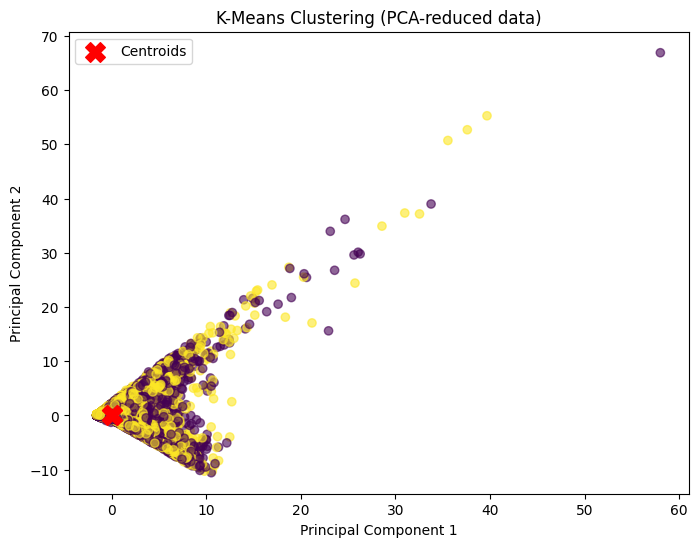

In [109]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Get cluster assignments
train_clusters = kmeans.predict(X_train_scaled)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(
    X_train_pca[:, 0], X_train_pca[:, 1],
    c=train_clusters, cmap="viridis", alpha=0.6
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red', marker='X', label='Centroids'
)
plt.title("K-Means Clustering (PCA-reduced data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

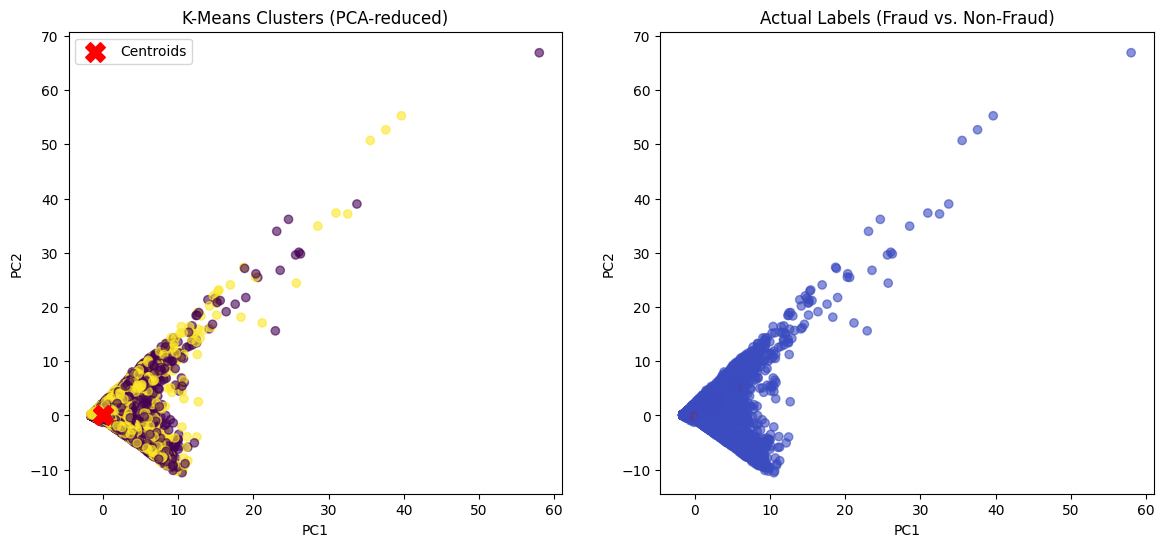

In [110]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Cluster assignments
train_clusters = kmeans.predict(X_train_scaled)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Left: KMeans clusters
axes[0].scatter(
    X_train_pca[:, 0], X_train_pca[:, 1],
    c=train_clusters, cmap="viridis", alpha=0.6
)
axes[0].scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red', marker='X', label='Centroids'
)
axes[0].set_title("K-Means Clusters (PCA-reduced)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].legend()

# Right: Actual labels
axes[1].scatter(
    X_train_pca[:, 0], X_train_pca[:, 1],
    c=y_train, cmap="coolwarm", alpha=0.6
)
axes[1].set_title("Actual Labels (Fraud vs. Non-Fraud)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.show()

In [112]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np



# Fit One-Class SVM
ocsvm = OneClassSVM(kernel="rbf", nu=0.01, gamma="scale")  
ocsvm.fit(X_train)

# Predict (-1 = anomaly, 1 = normal)
y_pred = ocsvm.predict(X_test)

# Map predictions to fraud (1) vs non-fraud (0)
# OneClassSVM: -1 means anomaly → fraud, 1 means inlier → not fraud
y_pred_mapped = np.where(y_pred == -1, 1, 0)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mapped))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mapped, digits=4))

Confusion Matrix:
[[19803   171]
 [   26     0]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9987    0.9914    0.9951     19974
           1     0.0000    0.0000    0.0000        26

    accuracy                         0.9901     20000
   macro avg     0.4993    0.4957    0.4975     20000
weighted avg     0.9974    0.9901    0.9938     20000



In [113]:
from sklearn.neighbors import LocalOutlierFactor

# Initialize the LOF model
lof = LocalOutlierFactor(
    n_neighbors=20,   # Number of neighbors to consider
    contamination=0.1,  # Approximate fraction of outliers in the data
    novelty=True       # Set True if you want to use LOF for predicting on new data
)

# Fit the LOF model on the training data
lof.fit(X_train)

# Predict anomalies on the test set
# -1 indicates an outlier, 1 indicates an inlier
y_pred = lof.predict(X_test)

# If you want a probability-like score
scores = lof.decision_function(X_test)

C:\Users\warif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\warif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [118]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import LocalOutlierFactor

# Initialize LOF
lof = LocalOutlierFactor(
    n_neighbors=1000,
    contamination=0.1,
    novelty=True  # allows predicting on new data
)

# Fit on training data
lof.fit(X_train)

# Predict on test data
# LOF returns -1 for outliers, 1 for inliers
y_pred = lof.predict(X_test)

# Convert predictions to 0 (inlier) / 1 (outlier) to match isFraud
y_pred_binary = [1 if x == -1 else 0 for x in y_pred]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_pred_binary)
print("\nClassification Report:")
print(cr)

# Optional: decision function scores
scores = lof.decision_function(X_test)  # higher = more normal, lower = more abnormal

C:\Users\warif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Confusion Matrix:
[[18045  1929]
 [   25     1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     19974
           1       0.00      0.04      0.00        26

    accuracy                           0.90     20000
   macro avg       0.50      0.47      0.47     20000
weighted avg       1.00      0.90      0.95     20000



C:\Users\warif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [119]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,       # Number of trees, more trees = more stable
    max_samples='auto',     # Uses all samples for training
    contamination=0.01,     # Estimated fraction of frauds (adjust if needed)
    random_state=42
)

# Fit on training data
iso_forest.fit(X_train)

# Predict anomalies on test data
# -1 = outlier (fraud), 1 = inlier (normal)
y_pred = iso_forest.predict(X_test)

# Map predictions to 0 (normal) / 1 (fraud) to match your labels
y_pred_binary = [1 if x == -1 else 0 for x in y_pred]

# Evaluate results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

# Optional: anomaly scores (lower = more likely fraud)
scores = iso_forest.decision_function(X_test)

Confusion Matrix:
[[19750   224]
 [   25     1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19974
           1       0.00      0.04      0.01        26

    accuracy                           0.99     20000
   macro avg       0.50      0.51      0.50     20000
weighted avg       1.00      0.99      0.99     20000



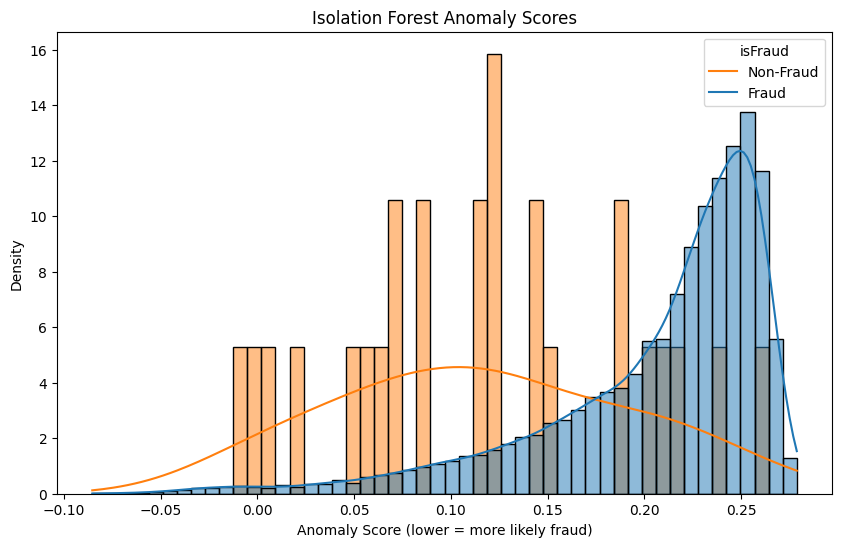

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with test labels and anomaly scores
df_scores = pd.DataFrame({
    'isFraud': y_test,
    'score': scores
})

# Plot distributions of scores for fraud vs non-fraud
plt.figure(figsize=(10,6))
sns.histplot(data=df_scores, x='score', hue='isFraud', bins=50, kde=True, stat="density", common_norm=False)
plt.title("Isolation Forest Anomaly Scores")
plt.xlabel("Anomaly Score (lower = more likely fraud)")
plt.ylabel("Density")
plt.legend(title='isFraud', labels=['Non-Fraud', 'Fraud'])
plt.show()

Threshold: 0.15
True Positives (fraud caught): 19
False Positives (non-fraud flagged): 3052
True Negatives (non-fraud correct): 16922
False Negatives (fraud missed): 7


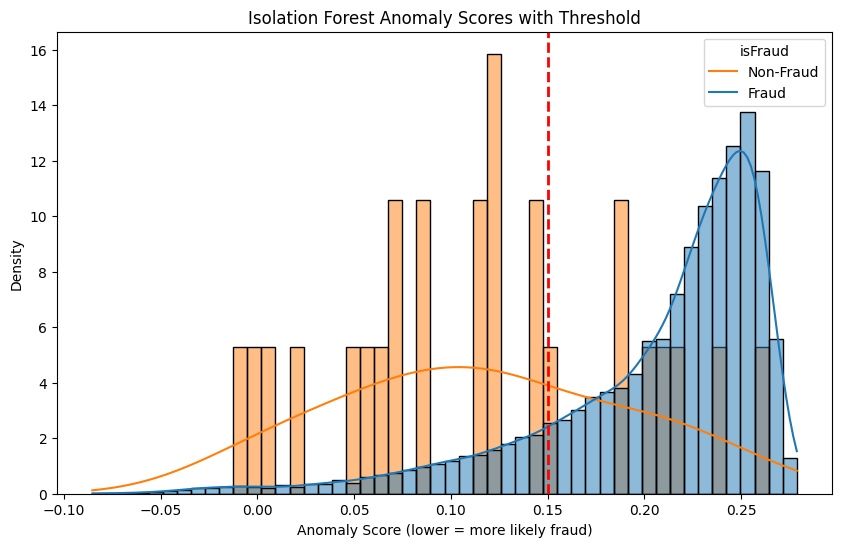

In [121]:
threshold = 0.15

# Classify: 1 = fraud, 0 = non-fraud
df_scores['predicted'] = (df_scores['score'] < threshold).astype(int)

# Compute confusion matrix-like values
tp = ((df_scores['predicted'] == 1) & (df_scores['isFraud'] == 1)).sum()
fp = ((df_scores['predicted'] == 1) & (df_scores['isFraud'] == 0)).sum()
tn = ((df_scores['predicted'] == 0) & (df_scores['isFraud'] == 0)).sum()
fn = ((df_scores['predicted'] == 0) & (df_scores['isFraud'] == 1)).sum()

print("Threshold:", threshold)
print(f"True Positives (fraud caught): {tp}")
print(f"False Positives (non-fraud flagged): {fp}")
print(f"True Negatives (non-fraud correct): {tn}")
print(f"False Negatives (fraud missed): {fn}")

# Re-plot with threshold line
plt.figure(figsize=(10,6))
sns.histplot(data=df_scores, x='score', hue='isFraud', bins=50, kde=True, stat="density", common_norm=False)
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold = {threshold}')
plt.title("Isolation Forest Anomaly Scores with Threshold")
plt.xlabel("Anomaly Score (lower = more likely fraud)")
plt.ylabel("Density")
plt.legend(title='isFraud', labels=['Non-Fraud', 'Fraud'])
plt.show()

In [128]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Fit unsupervised kNN model
nbrs = NearestNeighbors(n_neighbors=5)
nbrs.fit(X_train)

# Distance to the 5th nearest neighbor
distances, _ = nbrs.kneighbors(X_train)
k_distances = distances[:, -1]  # farthest among 5 neighbors

# Threshold for anomaly detection
threshold = np.percentile(k_distances, 95)  

# Predict anomalies
y_pred_unsupervised = (k_distances > threshold).astype(int)

In [130]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Fit unsupervised kNN model on training data
nbrs = NearestNeighbors(n_neighbors=5)
nbrs.fit(X_train)

# Distance to the 5th nearest neighbor for test set
distances, _ = nbrs.kneighbors(X_test)
k_distances = distances[:, -1]  # farthest among 5 neighbors

# Threshold: top 5% as anomalies (tuneable)
threshold = np.percentile(k_distances, 95)

# Predictions: anomaly = 1 (fraud), normal = 0
y_pred_unsupervised = (k_distances > threshold).astype(int)

# --- Evaluation against true fraud labels ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_unsupervised))
print("\nClassification Report:\n", classification_report(y_test, y_pred_unsupervised))
print("Accuracy:", accuracy_score(y_test, y_pred_unsupervised))

Confusion Matrix:
 [[18978   996]
 [   22     4]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     19974
           1       0.00      0.15      0.01        26

    accuracy                           0.95     20000
   macro avg       0.50      0.55      0.49     20000
weighted avg       1.00      0.95      0.97     20000

Accuracy: 0.9491


In [131]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred_unsupervised = lof.fit_predict(X)

# Map LOF output (-1 = outlier, 1 = inlier) to (1 = fraud, 0 = not fraud)
y_pred_unsupervised = (y_pred_unsupervised == -1).astype(int)

In [133]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train LOF (unsupervised kNN anomaly detection)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# LOF predicts on all data at once, so split manually
y_pred_unsupervised = lof.fit_predict(X_test)

# Convert LOF output: -1 = anomaly (fraud), 1 = inlier (not fraud)
y_pred_unsupervised = (y_pred_unsupervised == -1).astype(int)

# Evaluation against true labels
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_unsupervised))
print("\nClassification Report:\n", classification_report(y_test, y_pred_unsupervised))
print("Accuracy:", accuracy_score(y_test, y_pred_unsupervised))

Confusion Matrix:
 [[18975   999]
 [   25     1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     19974
           1       0.00      0.04      0.00        26

    accuracy                           0.95     20000
   macro avg       0.50      0.49      0.49     20000
weighted avg       1.00      0.95      0.97     20000

Accuracy: 0.9488


In [3]:
# Check if the first 100 rows contain any fraud cases
has_fraud = df.head(100)['isFraud'].any()
print("Is there any fraud in the first 100 rows?", has_fraud)

Is there any fraud in the first 100 rows? False


In [ ]:
import pandas as pd
import numpy as np

# Sample 100 rows where isFraud == 0
df_false = df[df['isFraud'] == 0].sample(100, random_state=42)

# Sample 3 rows where isFraud == 1 (if available, else use 0s)
if (df['isFraud'] == 1).sum() >= 3:
    df_true = df[df['isFraud'] == 1].sample(3, random_state=42)

# Concatenate and shuffle
df_103 = pd.concat([df_false, df_true], ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)

# Remove 'isFraud' and 'isFlaggedFraud' columns if present
cols_to_drop = [col for col in ['isFraud', 'isFlaggedFraud'] if col in df_103.columns]
df_103_nolabel = df_103.drop(columns=cols_to_drop)

# Save to CSV
df_103_nolabel.to_csv("sample103_nolabel.csv", index=False)